# Collect tweets in MongoDB

### A. Start Twitter instance and save tweet flow in Mongo DB database

### B. Load MongoDB collection and plot the flow

### C. Retreive the most re-tweeted tweets and analyse their sentiment 


 Sources:

  - Mining the Social Web, 2nd Edition by Matthew A. Russell
    
    
#### Introduction :

Twitter is really nice as a tool for analysing market sentiment. This Notebook is a quick template to use for collecting tweets from Twitter from either the live firehose or Search API and store them in a MongoDB. As I have been working in Oil & Gas trading, we will use the #OOTT for analysing market sentiment for Oil trading. 

We will also plot the evolution of tweet flow. 

I recommend reading "Mining the Social Web", the code is taken from the book, which is very well done.
Hope this Notebook will be useful for people who needs quick and easy to use code sample for analysing Market sentiment from Twitter.

If you have any feedback and suggestion, feel free to contact me. 
baptistequidet@gmail.com
+971 552 330 210


### A. Start Twitter instance and save tweet flow in Mongo DB database

In [1]:
# Finding topics of interest by using the filtering capablities it offers.

import twitter
import sys
import json
import pymongo # pip install pymongo
from twitter import Twitter, OAuth
import pandas as pd
from pandas import Series, DataFrame

CONSUMER_KEY = 'sumrNLA3nQPMPQIVduDJ0QQLq'
CONSUMER_SECRET = 'K4jXK1NnvDwKEIbFMc5RV5ggKVhR9ijyXhADQ6MhZ2cDWf5z3y'
OAUTH_TOKEN = '886805184147587072-VA6Ot1dwxW79nGFO1mlnZVFLfsjpae2'
OAUTH_TOKEN_SECRET = 'PtAFjFSox2q0WDwpfNAHiaPD8CqimqfAy32NLfj6ksxAm'


auth = OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)


# Query terms
q = 'OOTT' # Comma-separated list of terms

print('Filtering the public timeline for track="%s"' % (q,), file=sys.stderr )

# Returns an instance of twitter.Twitter
twitter_api = twitter.Twitter(auth=auth)

# Reference the self.auth parameter
twitter_stream = twitter.TwitterStream(auth=twitter_api.auth)

# See https://dev.twitter.com/docs/streaming-apis
stream = twitter_stream.statuses.filter(track=q)

# and something is sure to turn up (at least, on Twitter)

client = pymongo.MongoClient()
db = client.TwitterSerie
temporary = []

for tweet in stream:
    
    print(tweet['text'])
    # Save to a database in a particular collection
    db.tweetOOTT.insert_one(tweet)
    temporary.append(pd.to_datetime(tweet["created_at"]))
    
    #if len(temporary)>20:
    #    chart_tweet(temporary,"Evolution of 'OOTT' tweets on Dec 4" );
    

Filtering the public timeline for track="OOTT"


RT @dollarfire: Are we about to hit a market top? The #fintwit Guru numbers are rising like crazy. I feel like they might start selling Tul…
Interesting insight from @PetroleumEcon on Sakhalin Rosneft-ExxonMobile dispute. According to our information, equi… https://t.co/MYpXLQZOik
What are the top 3 challenges and opportunities for #refiners as they enter a new era of lower HSFO demand? #marine… https://t.co/JDzsy5zWsm
RT @InnovOil: Aramco IPO Mothballed As MbS Saves Face With SABIC Deal https://t.co/ZZBuTvPqGl Saudi Arabia has pulled the plug (at least fo…
The U.S., Europe and Saudi Arabia may need to tap crude stockpiles to meet demand and keep prices from rising too h… https://t.co/9cKZINgY2j
RT @staunovo: The U.S., Europe and Saudi Arabia may need to tap crude stockpiles to meet demand and keep prices from rising too high if Ira…
Even with a conservative crude production loss estimate from Iran, Rystad Energy projects that OPEC-12 will need to… https://t.co/k1XR43FAbp
RT @staunovo:

RT @InnovOil: Strike! ONGC Discovers Oil And Gas In Two Undeveloped Basins https://t.co/M0S5QzVf5n India’s state-owned @ONGC_  has discover…
RT @Ole_S_Hansen: Changes in the crude #oil positions highlighted the recent shift towards Brent crude (+23k lots) as its premium to WTI (-…
RT @Ole_S_Hansen: Changes in the crude #oil positions highlighted the recent shift towards Brent crude (+23k lots) as its premium to WTI (-…
RT @IEA: "If Venezuelan 🇻🇪 &amp; Iranian 🇮🇷 exports do continue to fall, markets could tighten and oil prices could rise without offsetting pro…
RT @SusanSakmar: Arrived in #Barcelona today and looking forward to #Gastech2018 VIP program on Sunday and official opening of @GastechEven…
RT @PetroleumEcon: Mexican deep-water opportunities are about to become more interesting  #OOTT https://t.co/vyGT3dtz9T
AI-based software is  shaking up the commodity trading market #oott https://t.co/Nbe0bOuMLn
The Eastern Mediterranean is suddenly the place where the majors want to be   #

RT @Ole_S_Hansen: The COT report covering the wk to Sept 11 showed how leveraged funds continued to reduce bullish bets across 25 major #co…
#TheDRCongo #RDC #DRC #TheDRC #DRCongo
Update on synergy #Mining / #infrastructure 
While waiting for #Inga dam ,… https://t.co/oY8pz3KgYZ
#Strong enforcement &amp; compliance - momentum for the implementation of flag-state enforcement to ensure that port st… https://t.co/ZGhPsuvxxe
RT @NewsBase: Fortum-Led Group Bids For Montenegrin #Solar Project https://t.co/cSiJ5zwsUJ A consortium led by Finnish energy company @Fort…
No policy plan could cause higher prices at the pumps.
RT @dollarfire: Are we about to hit a market top? The #fintwit Guru numbers are rising like crazy. I feel like they might start selling Tul…
Is #OPEC prepared for the upcoming #oil crunch? Well, it all depends on which countries we are looking at.
#OOTT… https://t.co/yUK1z2zUu5
Greece is emerging as an potential exploration hotspot #OOTT https://t.co/tbIoYjnRbr
#AI enables unl

KeyboardInterrupt: 

### B. Load MongoDB collection and plot the flow

In [19]:
from prettytable import PrettyTable

client = pymongo.MongoClient()
db = client.TwitterSerie

pop_tweet =[]

for tweet in db.tweetOOTT.find():
    pop_tweet.append([tweet['retweet_count'],tweet['text'] ])

# We use retweet_count field in a tweet to know how many time this tweet has been retweeted
# It gives us popularity of the tweet and its potential impact in the market
pt = PrettyTable(field_names=['retweet_count', 'Text'])
[ pt.add_row(row) for row in pop_tweet ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)


+---------------+----------------------------------------------------+
| retweet_count | Text                                               |
+---------------+----------------------------------------------------+
| 0             | RT @OilSheppard: #SCOOP His name is Einar Aas, one |
|               | of Norway's wealthiest men.                        |
|               |                                                    |
|               | And he's just blown a €100m hole in Nasdaq's       |
|               | emergency stab…                                    |
| 0             | RT @dollarfire: Are we about to hit a market top?  |
|               | The #fintwit Guru numbers are rising like crazy. I |
|               | feel like they might start selling Tul…            |
| 0             | 🛢️🇬🇧 #BRENT Teknik Görünüm! Analiz detayına        |
|               | linkten ulaşabilirsiniz; https://t.co/CPuEZsQM6X…  |
|               | https://t.co/r2Z0i9PRVg                            |
| 0   

 Unfortunately, from the 1284 tweet saved during the 4 days,  11, 12, 13 and 15th of September 2018, we have not saved any popular tweet.
    

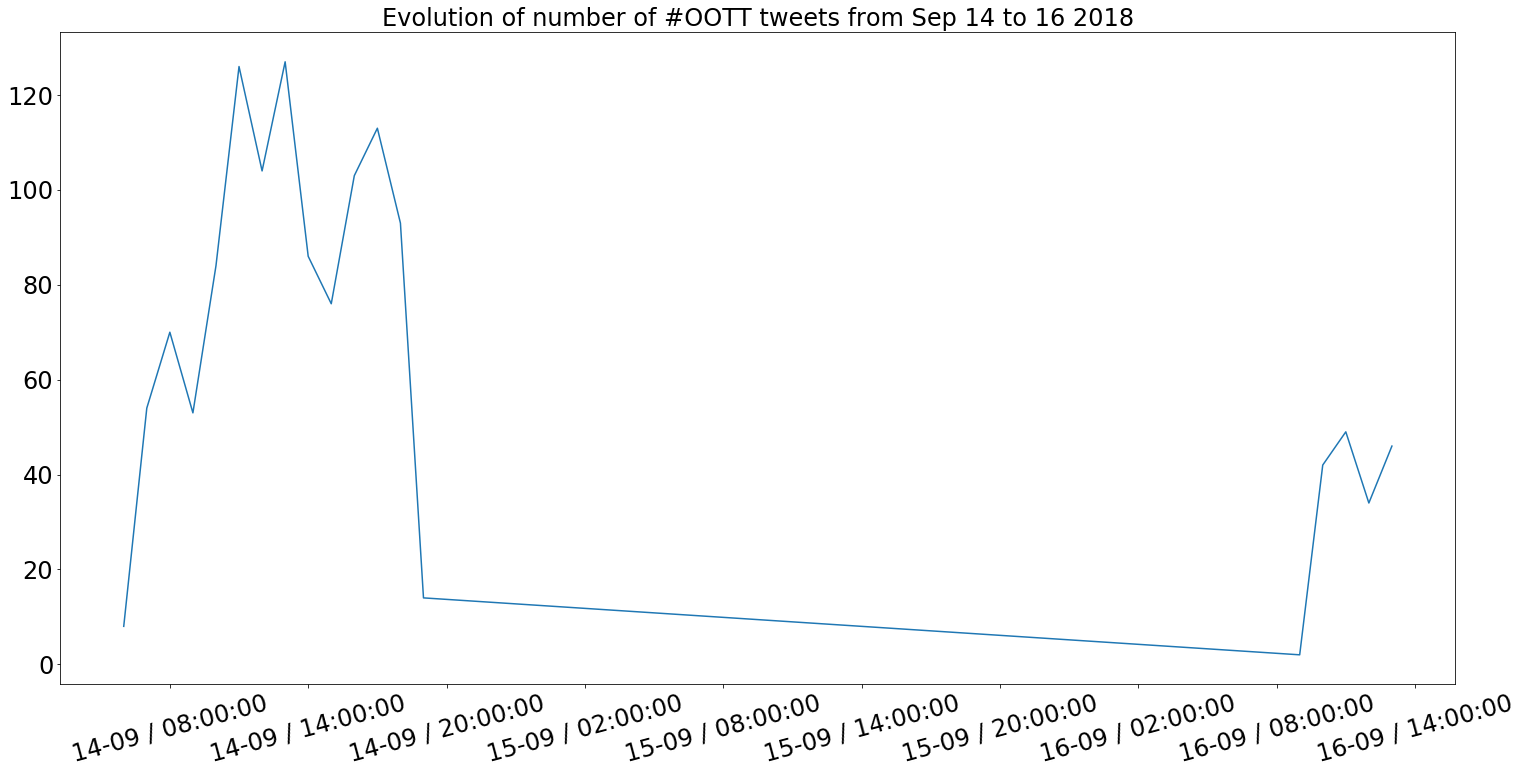

In [55]:
from pymongo import MongoClient
from bson import json_util
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import datetime
import matplotlib.dates as mdates

client = MongoClient()
db = client.TwitterSerie

# Search in our Collection tweetOOTT with the find() function and loop through all tweet to collect the date of creation
cursor = db.tweetOOTT.find()
plotdata = []

for document in cursor:
    plotdata.append(pd.to_datetime(document["created_at"])) 

def chart_tweet(data,text):
    
    days = mdates.DayLocator()
    hours = mdates.HourLocator()
    hoursFmt = mdates.DateFormatter('%H') 
    daysFmt = mdates.DateFormatter('%d') 

    Serie = Series(1, index=data)
    Serie.index = pd.to_datetime(Serie.index)
    
    # We create bins of tweet for each hour
    SerieM = Serie.groupby([Serie.index.year,Serie.index.month,Serie.index.day,Serie.index.hour]).sum()

    fig = plt.figure(figsize=(25, 12))
    ax = fig.add_subplot(1,1,1)

    plotdate = []
    for i in zip(SerieM.index):
        plotdate.append(datetime.datetime(int(i[0][0]),int(i[0][1]),int(i[0][2]),int(i[0][3]),0,0))

    #plt.setp(ax.xaxis.get_majorticklabels(), rotation=45,size=24)
    plt.setp(ax.yaxis.get_majorticklabels(), size=24)

    hfmt = mdates.DateFormatter('%d-%m / %H:%M:%S')
    ax.xaxis.set_major_formatter(hfmt)

    plt.setp(ax.xaxis.get_majorticklabels(), rotation=15,size=24)
    ax.plot(plotdate,SerieM.values)
    plt.title(  text ,fontsize=24);
    
chart_tweet(plotdata,"Evolution of number of #OOTT tweets from Sep 14 to 16 2018" )

 We see that the number of tweet increased on 14th of September to 120 tweets/hour btw 10am and 11am until afternoon to drop below 20 tweet/hour between 7pm and 8pm
 
 
 We see very small amount of tweets on 15th because it was week and I didn't collect from the firehose.
 
 On 16th it was Sunday and I started to collect tweets again, we see that the flow is much smaller, because outside of Dubai, it not working day.

### C. Retreive the most re-tweeted tweets and analyse their sentiment 

 Under working progress